In [ ]:
# Name- Manpreet Singh
# Student No- 300045244
# This notebook contains Question 1 and Question 2

### Import Libraries

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# from scipy.io import arff
# rawData = arff.loadarff('seismic-bumps.arff')
# data = pd.DataFrame(rawData[0])

### Load the dataset

In [2]:
# converted the dataset to csv using https://pulipulichen.github.io/jieba-js/weka/arff2csv/
data = pd.read_csv("csv_result-seismic-bumps.csv")
# dropping the id column as it got generated after converting to csv format
data.drop(['id'], axis = 1, inplace = True)
data.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


### Feature Normalization

In [3]:
# mapping the 'seismic' feature to the dictionary
data['seismic_num'] = data['seismic'].map({
    'a': 0,
    'b': 1
})

# mapping the 'shift' feature to the dictionary
data['shift_num'] = data['shift'].map({
    'W': 0,
    'N': 1
})

# dropping the mapped columns
data.drop(['seismic', 'shift'], axis = 1, inplace = True)

In [204]:
data.head()

,seismoacoustic,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class,seismic_num,shift_num
0,a,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0,0,1
1,a,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0,0,1
2,a,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0,0,1
3,a,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0,0,1
4,a,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0,0,1


In [4]:
# normalising 'seismoacoustic' feature
data_sctic = data.seismoacoustic
data_sctic = pd.get_dummies(data_sctic)
data = pd.concat([data, data_sctic], axis= 1)

In [5]:
data.columns = ['seismoacoustic', 'genergy', 'gpuls', 'gdenergy', 'gdpuls', 'ghazard',
       'nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5', 'nbumps6',
       'nbumps7', 'nbumps89', 'energy', 'maxenergy', 'class', 'seismic_num',
       'shift_num', 'seismoacoustic_a', 'seismoacoustic_b', 'seismoacoustic_c']

In [6]:
# dropping the seismoacoustic feature as it is normalised
data.drop(['seismoacoustic'], axis = 1, inplace = True)

In [7]:
# normalising 'ghazard' feature
data_ghz = data.ghazard
data_ghz = pd.get_dummies(data_ghz)
data = pd.concat([data, data_ghz], axis= 1)

In [8]:
data.columns = ['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'ghazard', 'nbumps',
       'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5', 'nbumps6', 'nbumps7',
       'nbumps89', 'energy', 'maxenergy', 'class', 'seismic_num', 'shift_num',
       'seismoacoustic_a', 'seismoacoustic_b', 'seismoacoustic_c', 'ghazard_a', 'ghazard_b',
       'ghazard_c']

In [9]:
# dropping the ghazard feature as it is normalised
data.drop(['ghazard'], axis = 1, inplace = True)

### Feature selection and data splitting

In [10]:
y = data['class']
X = data.drop(['class'], axis = 1)
# 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [11]:
# scaling the values between the range 0 to 1
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
data = scaler.fit_transform(data)

## Classifiers

### 1. Decision tree

In [213]:
# cross validation (n=10)
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in cv.split(data):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = data[train_index], data[test_index], y[train_index], y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

Train Index:  [ 259  260  261 ... 2581 2582 2583] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

Train Index:  [   0    1    2 ... 2581 2582 2583] 

Test Index:  [1810 1811 1812 1813 1814 1815 1816 1817 1818 1819 1820 1821 1822 1823
 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833 1834 1835 1836 1837
 1838 1839 1840 1841 1842 1843 1844 1845 1846 1847 1848 1849 1850 1851
 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863 1864 1865
 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879
 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893
 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907
 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921
 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1

In [214]:
# 1. Decision tree
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [215]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)

[[251   0]
 [  0   7]]
1.0


In [136]:
# confusion matrix
y_act = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_act, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,0,1,All
Actual,,,
0,83,3,86
1,13,1,14
All,96,4,100


In [216]:
# minority class recall and precision
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       251
          1       1.00      1.00      1.00         7

avg / total       1.00      1.00      1.00       258



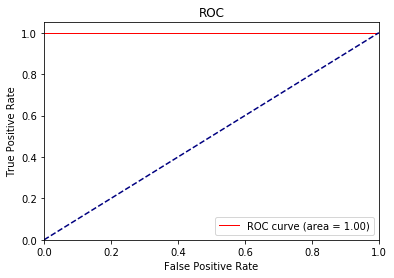

In [217]:
# ROC (Ref- https://qiita.com/bmj0114/items/460424c110a8ce22d945)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### 2. Rule‐based learning 

In [149]:
# 1. Rule‐based learning
classifier = DummyClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
# cross validation (n=10)
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in cv.split(data):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = data[train_index], data[test_index], y[train_index], y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

In [144]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)

[[452  39]
 [ 21   5]]
0.8839458413926499


In [145]:
# confusion matrix
y_act = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_act, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,0,1,All
Actual,,,
0,79,7,86
1,13,1,14
All,92,8,100


In [146]:
# minority class recall and precision
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.92      0.94       491
          1       0.11      0.19      0.14        26

avg / total       0.91      0.88      0.90       517



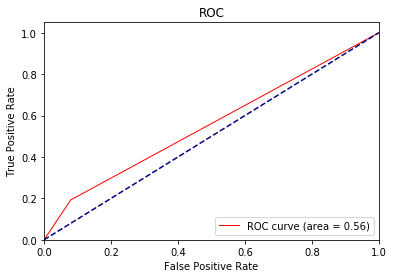

In [147]:
# ROC (Ref- https://qiita.com/bmj0114/items/460424c110a8ce22d945)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### 3. Naïve Bayesian classifiers

In [ ]:
# cross validation (n=10)
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in cv.split(data):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = data[train_index], data[test_index], y[train_index], y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

In [173]:
# 3. Naïve Bayesian classifiers
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [174]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)

[[251   0]
 [  0   7]]
1.0


In [ ]:
# confusion matrix
y_act = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_act, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

In [176]:
# minority class recall and precision
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       251
          1       1.00      1.00      1.00         7

avg / total       1.00      1.00      1.00       258



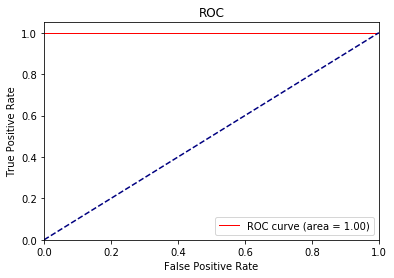

In [177]:
# ROC (Ref- https://qiita.com/bmj0114/items/460424c110a8ce22d945)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### 4. K-nearest neighbor classifier

In [12]:
# cross validation (n=10)
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in cv.split(data):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = data[train_index], data[test_index], y[train_index], y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

Train Index:  [ 259  260  261 ... 2581 2582 2583] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Train Index:  [   0    1    2 ... 2581 2582 2583] 

Test Index:  [1036 1037 1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048 1049
 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063
 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077
 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091
 1092 1093 1094 1095 1096 1097 1098 1099 1100 1101 1102 1103 1104 1105
 1106 1107 1108 1109 1110 1111 1112 1113 1114 1115 1116 1117 1118 1119
 1120 1121 1122 1123 1124 1125 1126 1127 1128 1129 1130 1131 1132 1133
 1134 1135 1136 1137 1138 1139 1140 1141 1142 1143 1144 1145 1146 1147
 1148 1149 1150 1151 1152 1153 1154 1155 1156 1157 1158 1159 1160 1161
 1162 1163 1164 1165 1166 1167 1168 1169 1170 1171 1172 1173 1174 1175
 1176 1177 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189
 1190 1191 1192 1193 1194 1195 1196 1197 1198 1199 1200 1201 1202 1203
 1204 1205 1206 1207 1208 1209 1210 1211 1212 1213 1214 1215 1216 1217
 1218 1219 1

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Train Index:  [   0    1    2 ... 2323 2324 2325] 

Test Index:  [2326 2327 2328 2329 2330 2331 2332 2333 2334 2335 2336 2337 2338 2339
 2340 2341 2342 2343 2344 2345 2346 2347 2348 2349 2350 2351 2352 2353
 2354 2355 2356 2357 2358 2359 2360 2361 2362 2363 2364 2365 2366 2367
 2368 2369 2370 2371 2372 2373 2374 2375 2376 2377 2378 2379 2380 2381
 2382 2383 2384 2385 2386 2387 2388 2389 2390 2391 2392 2393 2394 2395
 2396 2397 2398 2399 2400 2401 2402 2403 2404 2405 2406 2407 2408 2409
 2410 2411 2412 2413 2414 2415 2416 2417 2418 2419 2420 2421 2422 2423
 2424 2425 2426 2427 2428 2429 2430 2431 2432 2433 2434 2435 2436 2437
 2438 2439 2440 2441 2442 2443 2444 2445 2446 2447 2448 2449 2450 2451
 2452 2453 2454 2455 2456 2457 2458 2459 2460 2461 2462 2463 2464 2465
 2466 2467 2468 2469 2470 2471 2472 2473 2474 2475 2476 2477 2478 2479
 2480 2481 2482 2483 2484 2485 2486 2487 2488 2489 2490 2491 2492 2493
 2494 2495 2496 2497 2498 2499 2500 2501 2502 2503 2504 2505 2506 2507
 2508 2509 2

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [13]:
# 3. K-nearest neighbor classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [14]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)

[[251   0]
 [  0   7]]
1.0


In [197]:
# confusion matrix
y_act = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_act, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,0,1,All
Actual,,,
0,84,2,86
1,14,0,14
All,98,2,100


In [198]:
# minority class recall and precision
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       491
          1       0.00      0.00      0.00        26

avg / total       0.90      0.94      0.92       517



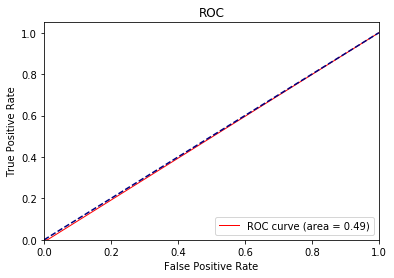

In [199]:
# ROC (Ref- https://qiita.com/bmj0114/items/460424c110a8ce22d945)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()